In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown --id 11PmIWLSV5RsQSNOFuUG9mX3rAYWd8Hig # Download File

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11PmIWLSV5RsQSNOFuUG9mX3rAYWd8Hig
To: /content/Banking Marketing Precision.csv
100% 4.10M/4.10M [00:00<00:00, 76.9MB/s]


In [ ]:
# read your data
raw_df = pd.read_csv('/content/Banking Marketing Precision.csv')
raw_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


# Check dataset

In [ ]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes
45661,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310.0,1.0,-1.0,0.0,unknown,yes


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45663 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45663 non-null  int64  
 1   job        45663 non-null  object 
 2   marital    45663 non-null  object 
 3   education  45663 non-null  object 
 4   default    45663 non-null  object 
 5   balance    45663 non-null  int64  
 6   housing    45663 non-null  object 
 7   loan       45663 non-null  object 
 8   contact    45663 non-null  object 
 9   day        45663 non-null  int64  
 10  month      45663 non-null  object 
 11  duration   45317 non-null  float64
 12  campaign   45281 non-null  float64
 13  pdays      45446 non-null  float64
 14  previous   45395 non-null  float64
 15  poutcome   45663 non-null  object 
 16  y          45355 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 5.9+ MB


In [ ]:
raw_df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     346
campaign     382
pdays        217
previous     268
poutcome       0
y            308
dtype: int64

In [ ]:
cats = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y" ]
nums = ["age", "balance", "day", "duration","campaign", "pdays", "previous"]

In [ ]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes
45661,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310.0,1.0,-1.0,0.0,unknown,yes


In [ ]:
raw_df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45663.000000,45663.000000,45663.000000,45317.000000,45281.000000,45446.000000,45395.000000
mean,40.937389,1363.058012,15.811248,258.226582,2.764250,40.166857,0.579667
std,10.616812,3049.909173,8.319972,257.642594,3.097611,100.063270,2.303390
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
raw_df[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45663,45663,45663,45663,45663,45663,45663,45663,45663,45355
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9816,27473,23418,44839,25380,38350,29574,13910,37344,40055


In [ ]:
raw_df['previous'].value_counts()

previous
0.0      37130
1.0       2773
2.0       2103
3.0       1146
4.0        712
5.0        461
6.0        279
7.0        207
8.0        128
9.0         91
10.0        68
11.0        65
12.0        44
13.0        39
15.0        20
14.0        19
17.0        15
16.0        14
19.0        11
20.0         9
23.0         8
18.0         6
22.0         6
24.0         5
27.0         5
21.0         4
29.0         4
25.0         4
30.0         3
38.0         2
37.0         2
26.0         2
28.0         2
51.0         1
275.0        1
58.0         1
32.0         1
40.0         1
55.0         1
35.0         1
41.0         1
Name: count, dtype: int64

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(raw_df[col].value_counts())
    print()

Value count kolom job:
job
blue-collar      9816
management       9566
technician       7684
admin.           5219
services         4187
retired          2293
self-employed    1589
entrepreneur     1503
unemployed       1312
housemaid        1254
student           946
unknown           294
Name: count, dtype: int64

Value count kolom marital:
marital
married     27473
single      12928
divorced     5262
Name: count, dtype: int64

Value count kolom education:
education
secondary    23418
tertiary     13449
primary       6914
unknown       1882
Name: count, dtype: int64

Value count kolom default:
default
no     44839
yes      824
Name: count, dtype: int64

Value count kolom housing:
housing
yes    25380
no     20283
Name: count, dtype: int64

Value count kolom loan:
loan
no     38350
yes     7313
Name: count, dtype: int64

Value count kolom contact:
contact
cellular     29574
unknown      13151
telephone     2938
Name: count, dtype: int64

Value count kolom month:
month
may    13910
jul

In [ ]:
# melihat ringkasan data
list_feature = []
for col in raw_df:
    list_feature.append([col,
                      raw_df[col].dtype,
                      raw_df[col].isna().sum(),
                      round(100*raw_df[col].isna().sum()/len(raw_df[col]), 2),
                      raw_df[col].nunique(),
                      raw_df[col].unique()[:5]])

raw_df_info = pd.DataFrame(data=list_feature, columns='colums, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
raw_df_info

,colums,datatype,null_values,null_percentage,unique_values,unique_sample
0,age,int64,0,0.00,77,"[58, 44, 33, 47, 35]"
1,job,object,0,0.00,12,"[management, technician, entrepreneur, blue-co..."
2,marital,object,0,0.00,3,"[married, single, divorced]"
3,education,object,0,0.00,4,"[tertiary, secondary, unknown, primary]"
4,default,object,0,0.00,2,"[no, yes]"
5,balance,int64,0,0.00,7168,"[2143, 29, 2, 1506, 1]"
6,housing,object,0,0.00,2,"[yes, no]"
7,loan,object,0,0.00,2,"[no, yes]"
8,contact,object,0,0.00,3,"[unknown, cellular, telephone]"
9,day,int64,0,0.00,31,"[5, 6, 7, 8, 9]"


# Data Cleansing

## Handle Missing Values

In [ ]:
raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes
45661,31,technician,married,secondary,no,318,no,no,cellular,2,dec,310.0,1.0,-1.0,0.0,unknown,yes


In [ ]:
# Menghapus baris dengan nilai yang hilang
clean_raw_df = raw_df.dropna()
clean_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44162 entries, 0 to 45662
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        44162 non-null  int64  
 1   job        44162 non-null  object 
 2   marital    44162 non-null  object 
 3   education  44162 non-null  object 
 4   default    44162 non-null  object 
 5   balance    44162 non-null  int64  
 6   housing    44162 non-null  object 
 7   loan       44162 non-null  object 
 8   contact    44162 non-null  object 
 9   day        44162 non-null  int64  
 10  month      44162 non-null  object 
 11  duration   44162 non-null  float64
 12  campaign   44162 non-null  float64
 13  pdays      44162 non-null  float64
 14  previous   44162 non-null  float64
 15  poutcome   44162 non-null  object 
 16  y          44162 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 6.1+ MB


**Data yang hilang (dalam %)**
* duration 346 = 0.76%
* campaign 382 = 0.84%
* pdays 217 = 0.47%
* previous 268 = 0.59%
* y 308 = 0.67%

Data yang hilang relatif kecil dibandingkan dengan jumlah total entri (45663 entries), maka diputuskan untuk menghapus baris data yang hilang.

**Handle Duplicate Data**

**Duplikat data tidak perlu di-handle.**

>
Terlihat bahwa dataset tidak memiliki keys (contoh: ID) yang secara unik mengidentifikasi setiap baris data. Tanpa adanya kunci unik ini, sulit untuk memastikan apakah baris-baris yang sama merujuk pada entitas yang sama atau apakah mereka benar-benar merupakan duplikat data yang harus dihapus. Tanpa kunci unik, tidak masuk akal untuk menganggap baris yang sama sebagai duplikat data yang harus dihapus.

## Handling Outlier

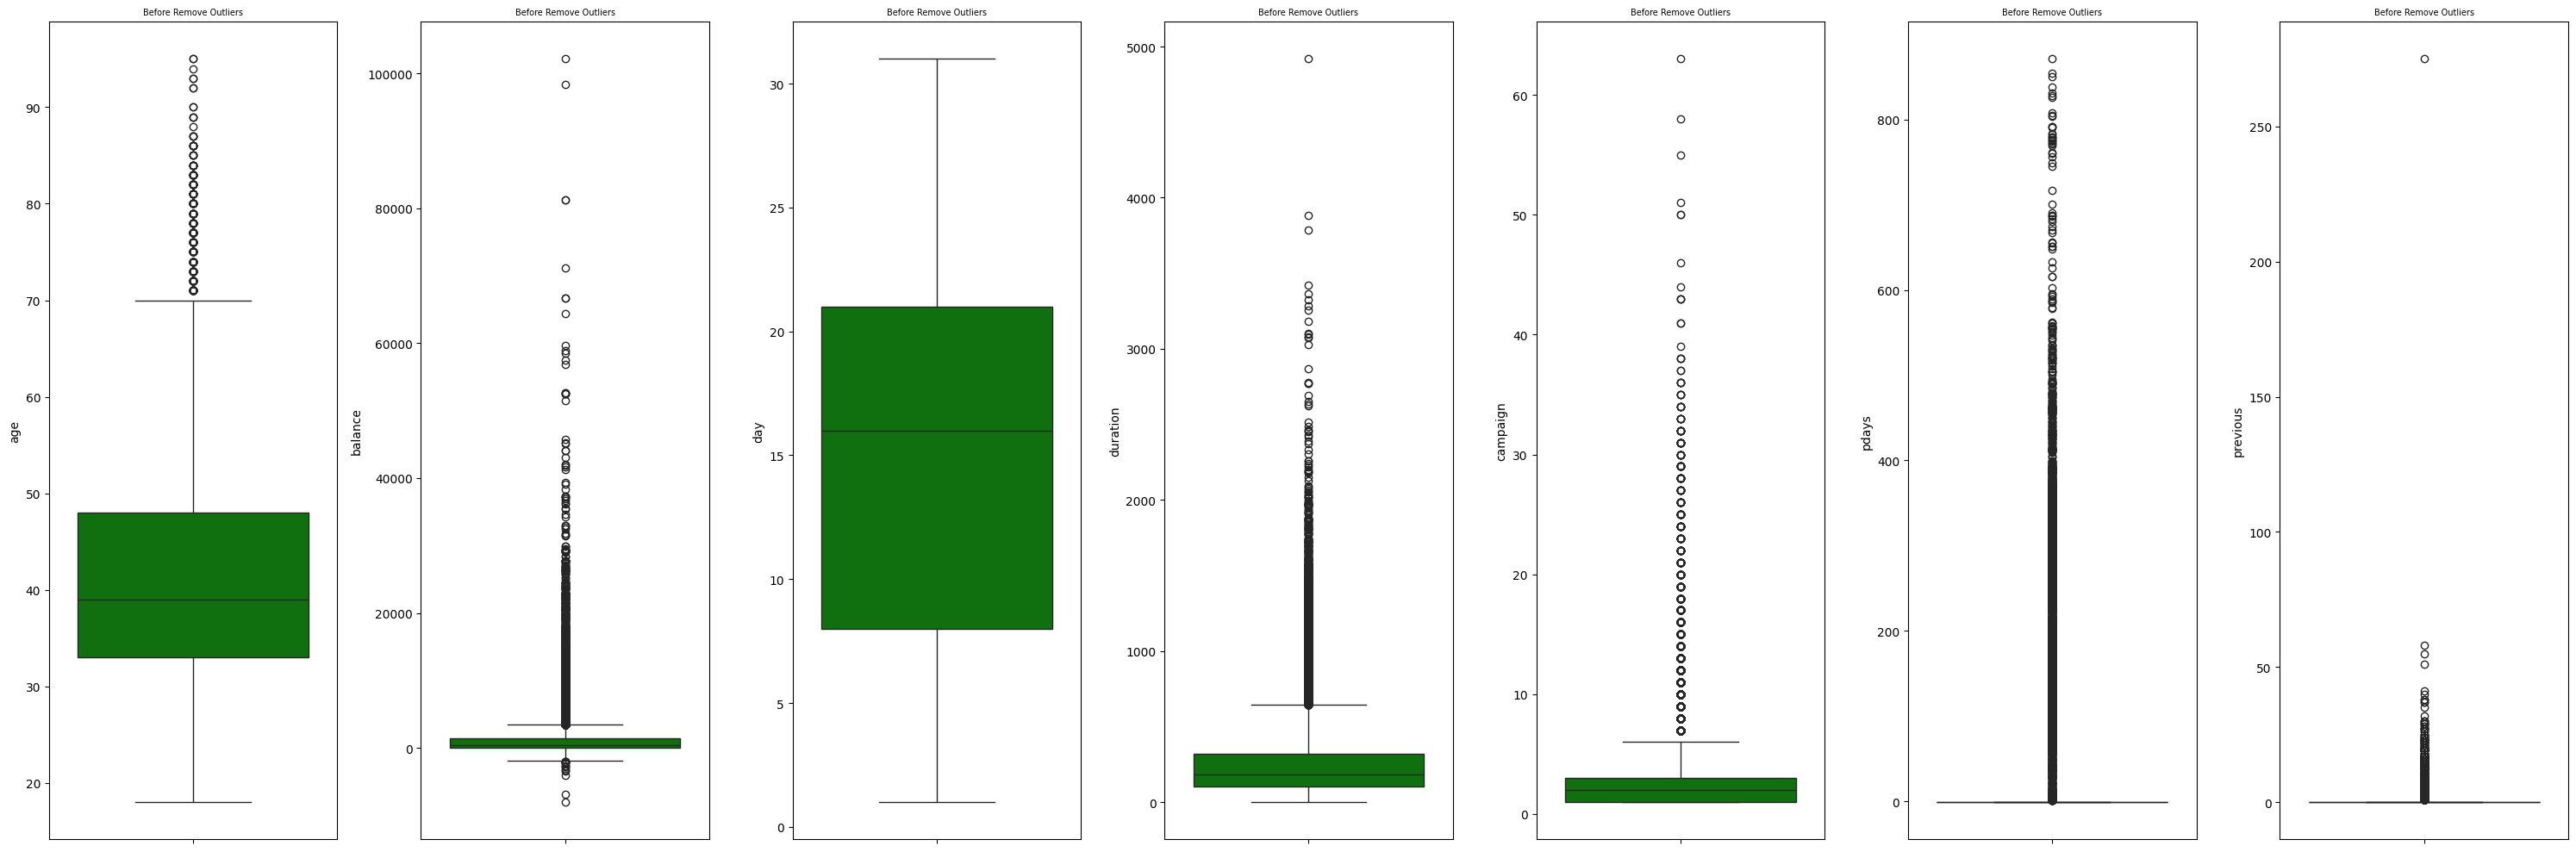

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=clean_raw_df[nums[i]], color='green', orient='v')
    plt.title('Before Remove Outliers', fontsize=7)
    plt.tight_layout()

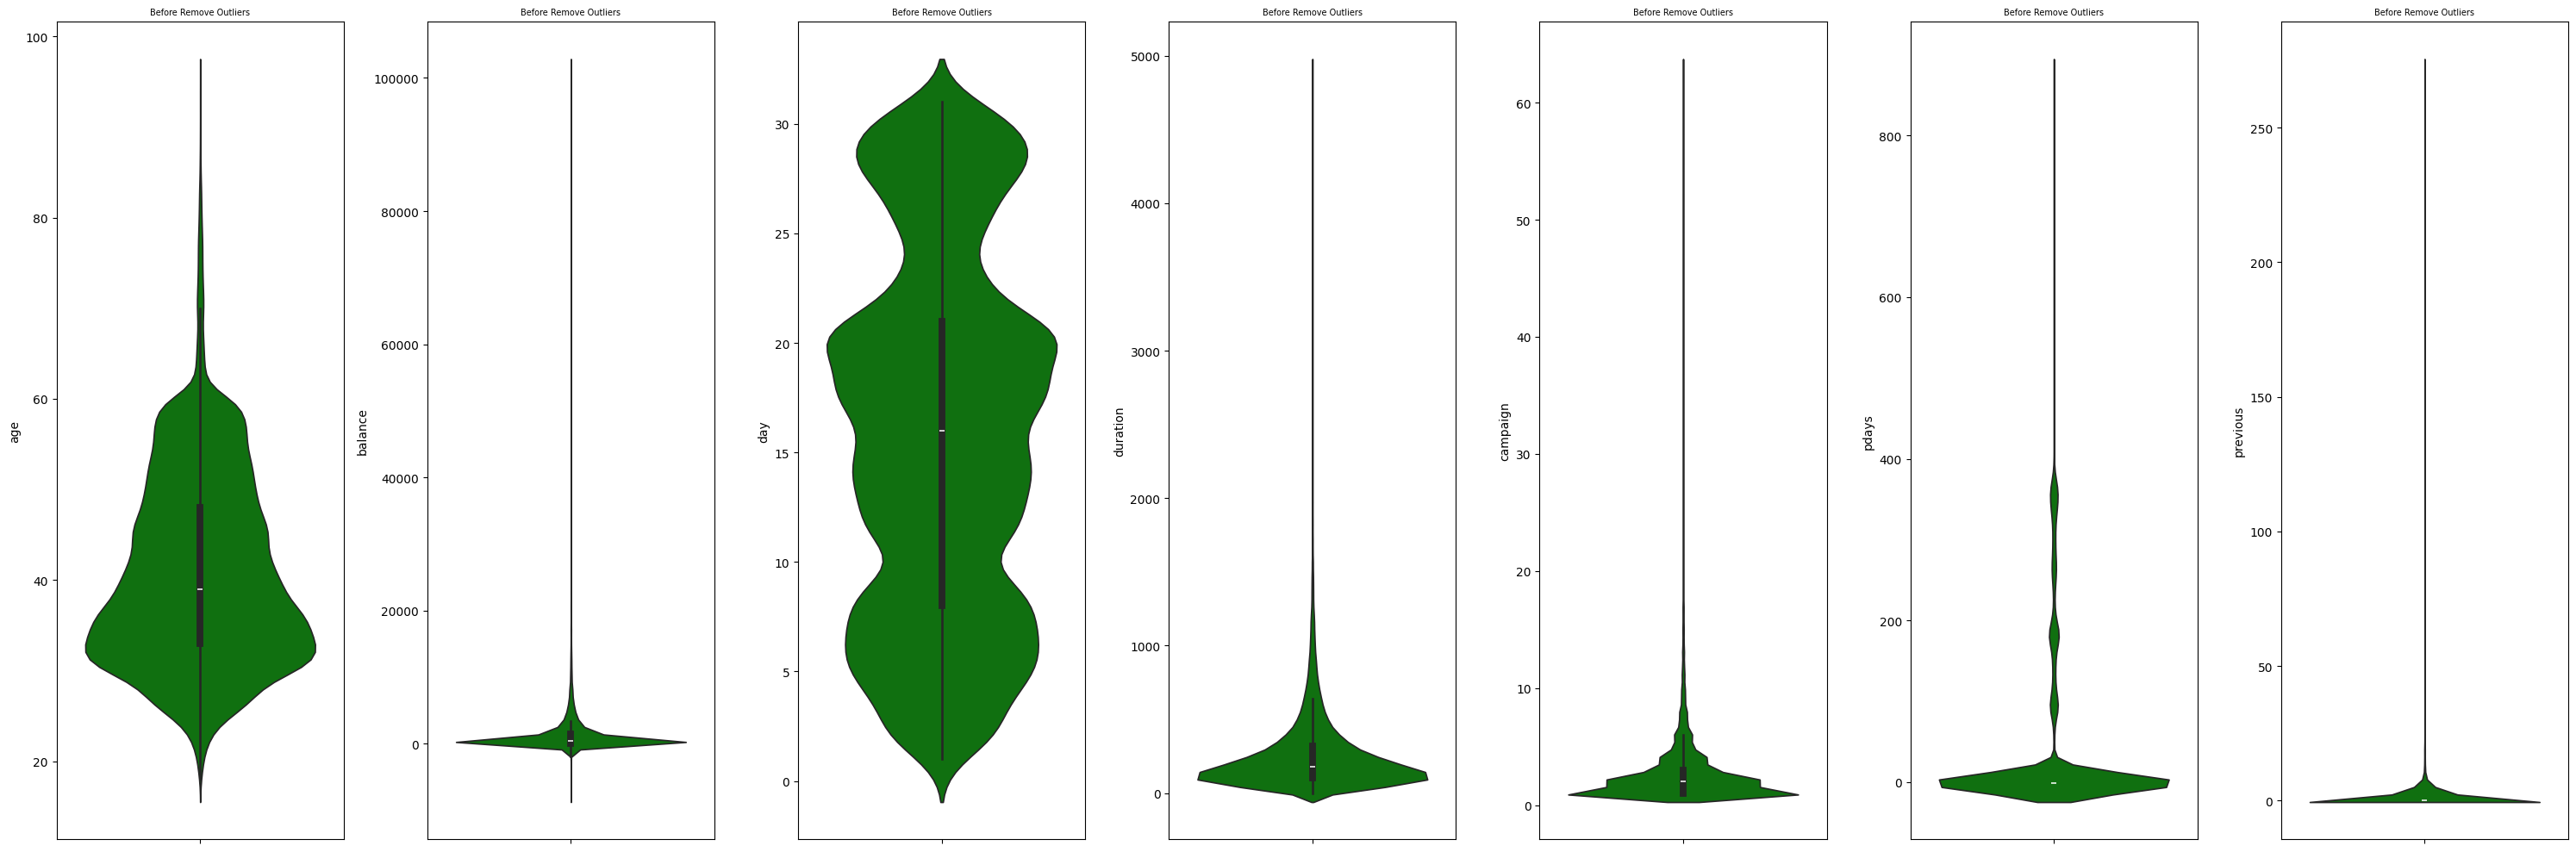

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=clean_raw_df[nums[i]], color='green', orient='v')
    plt.title('Before Remove Outliers', fontsize=7)
    plt.tight_layout()

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(clean_raw_df)}')

filtered_entries = np.array([True] * len(clean_raw_df))
for col in ["pdays","previous"] :
    Q1 = clean_raw_df[col].quantile(0.25)
    Q3 = clean_raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((clean_raw_df[col] >= low_limit) & (clean_raw_df[col] <= high_limit)) & filtered_entries

raw_df_filter = clean_raw_df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(raw_df_filter)}')

Jumlah baris sebelum memfilter outlier: 44162
Jumlah baris setelah memfilter outlier: 36129


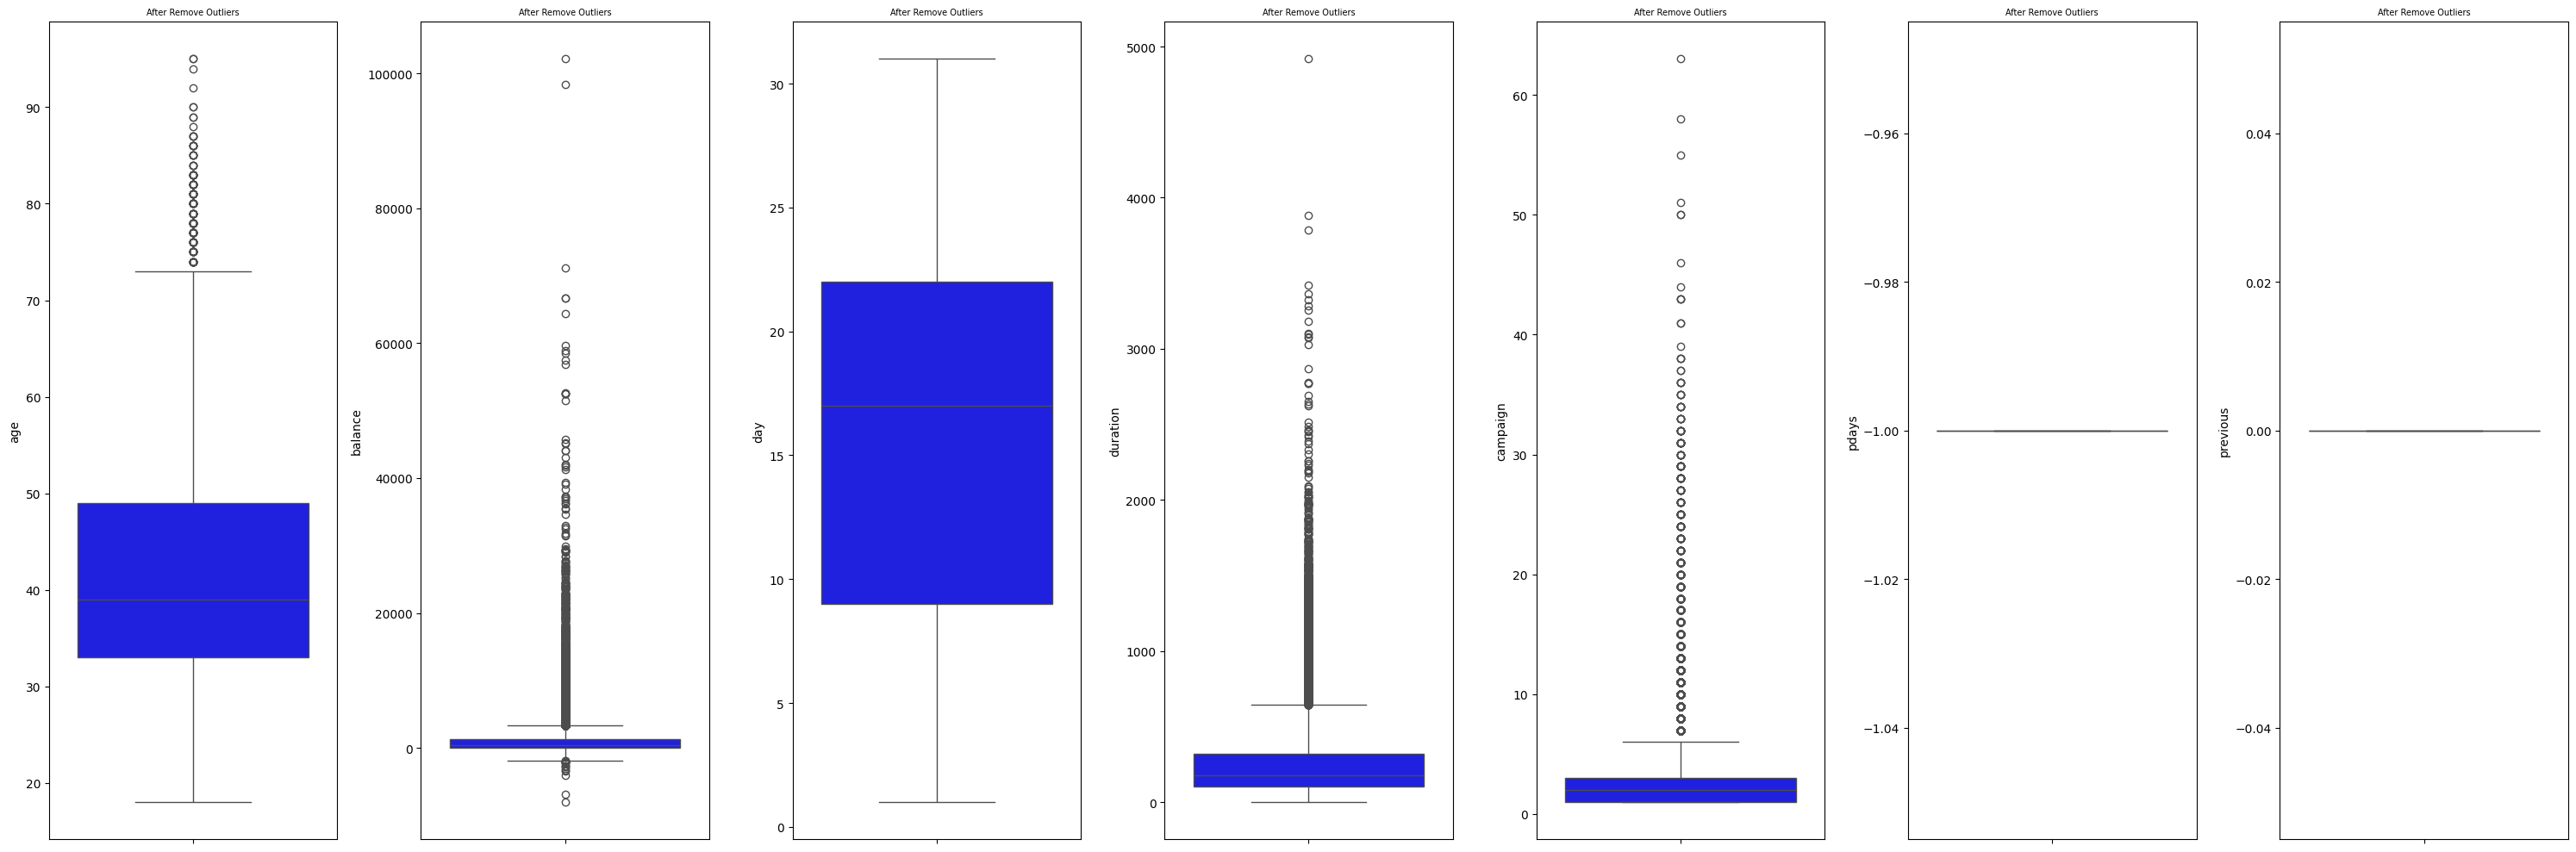

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=raw_df_filter[nums[i]], color='blue', orient='v')
    plt.title('After Remove Outliers', fontsize=7)
    plt.tight_layout()

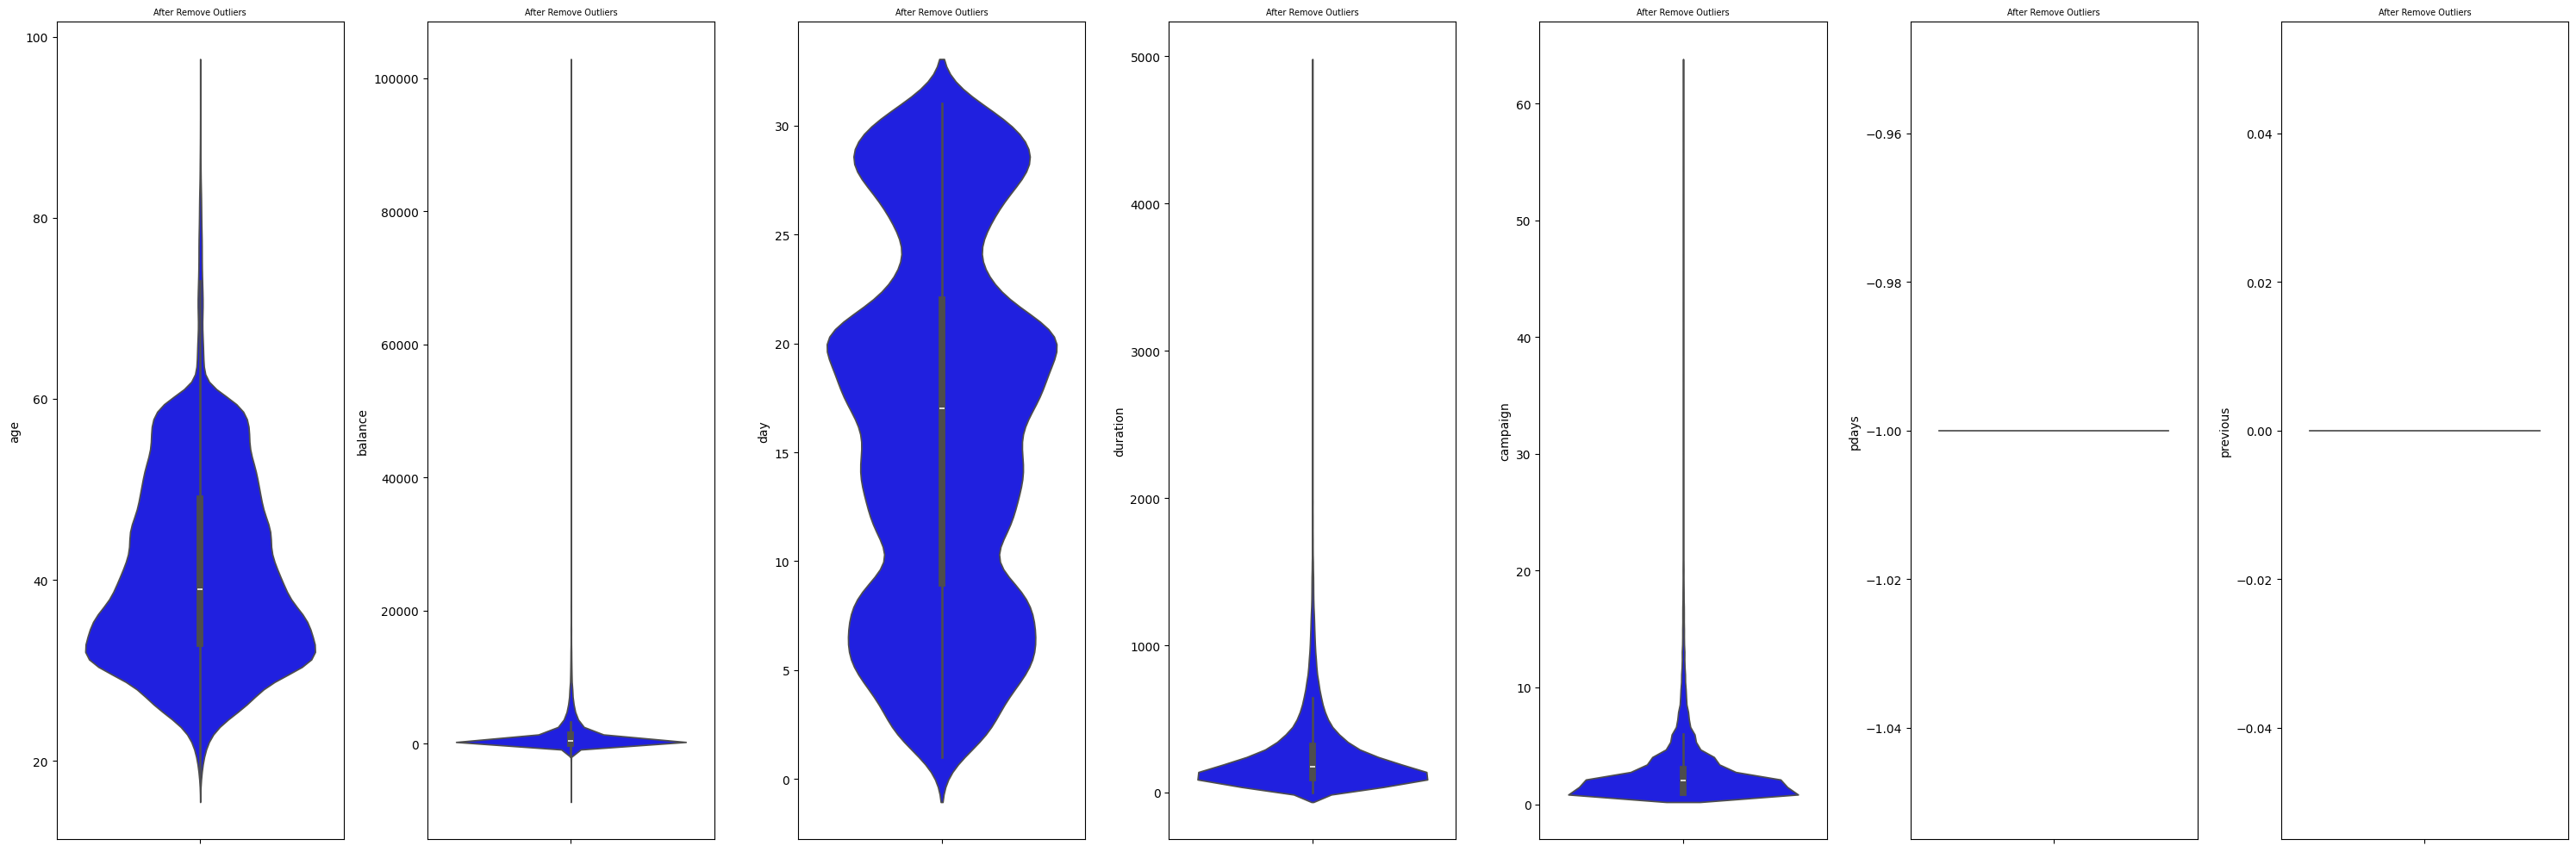

In [ ]:
plt.figure(figsize=(30, 10))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=raw_df_filter[nums[i]], color='blue', orient='v')
    plt.title('After Remove Outliers', fontsize=7)
    plt.tight_layout()

In [ ]:
# before handling outlier
clean_raw_df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,44162.000000,44162.000000,44162.000000,44162.000000,44162.000000,44162.000000,44162.000000
mean,40.930415,1359.549794,15.821045,258.326344,2.764820,40.026471,0.579797
std,10.600935,3059.497928,8.317017,258.076444,3.098708,99.899056,2.316225
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# after handling outlier
raw_df_filter[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,36129.000000,36129.000000,36129.000000,36129.000000,36129.000000,36129.0,36129.0
mean,40.927620,1315.936118,16.166708,257.974314,2.923109,-1.0,0.0
std,10.419046,3055.872179,8.366354,263.004393,3.325369,0.0,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,55.000000,9.000000,101.000000,1.000000,-1.0,0.0
50%,39.000000,413.000000,17.000000,177.000000,2.000000,-1.0,0.0
75%,49.000000,1355.000000,22.000000,318.000000,3.000000,-1.0,0.0
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,-1.0,0.0


Text(0, 0.5, 'Jumlah Pelanggan')

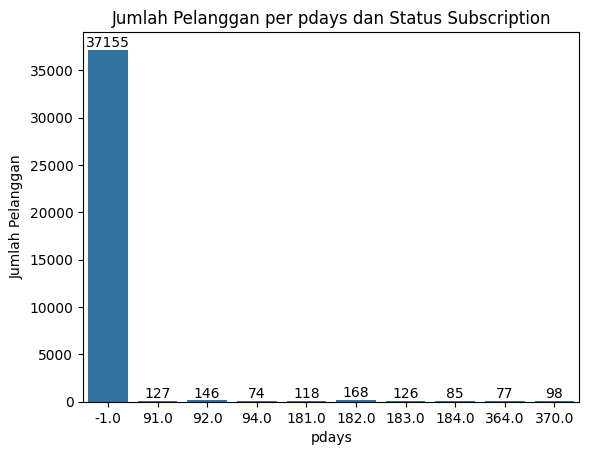

In [ ]:
# Batasi kategori
top_categories = raw_df['pdays'].value_counts().sort_values(ascending=False).index[:10]
raw_df = raw_df[raw_df['pdays'].isin(top_categories)]

# Gunakan hue untuk membedakan kategori
ax = sns.countplot(data=raw_df, x='pdays')
for cont in ax.containers:
  ax.bar_label(cont)

# Rotasi label sumbu x
plt.xticks(rotation=0)

# Tambahkan judul dan label
plt.title('Jumlah Pelanggan per pdays dan Status Subscription')
plt.xlabel('pdays')
plt.ylabel('Jumlah Pelanggan')

Text(0, 0.5, 'Jumlah Pelanggan')

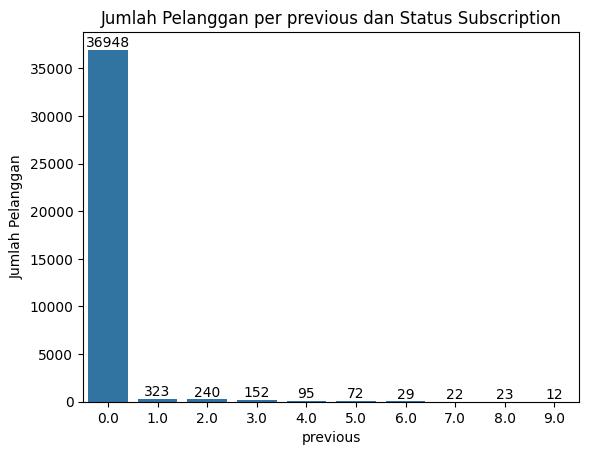

In [ ]:
# Batasi kategori
top_categories = raw_df['previous'].value_counts().sort_values(ascending=False).index[:10]
raw_df = raw_df[raw_df['previous'].isin(top_categories)]

# Gunakan hue untuk membedakan kategori
ax = sns.countplot(data=raw_df, x='previous')
for cont in ax.containers:
  ax.bar_label(cont)

# Rotasi label sumbu x
plt.xticks(rotation=0)

# Tambahkan judul dan label
plt.title('Jumlah Pelanggan per previous dan Status Subscription')
plt.xlabel('previous')
plt.ylabel('Jumlah Pelanggan')

In [ ]:
raw_df_filter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,management,single,tertiary,no,2813,no,no,cellular,14,aug,146.0,2.0,-1.0,0.0,unknown,no
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(raw_df_filter[col].value_counts())
    print()

Value count kolom job:
job
blue-collar      7938
management       7467
technician       6117
admin.           4007
services         3359
retired          1745
self-employed    1256
entrepreneur     1237
housemaid        1062
unemployed       1055
student           635
unknown           251
Name: count, dtype: int64

Value count kolom marital:
marital
married     21960
single      10003
divorced     4166
Name: count, dtype: int64

Value count kolom education:
education
secondary    18512
tertiary     10426
primary       5688
unknown       1503
Name: count, dtype: int64

Value count kolom default:
default
no     35389
yes      740
Name: count, dtype: int64

Value count kolom housing:
housing
yes    19557
no     16572
Name: count, dtype: int64

Value count kolom loan:
loan
no     30160
yes     5969
Name: count, dtype: int64

Value count kolom contact:
contact
cellular     21245
unknown      12649
telephone     2235
Name: count, dtype: int64

Value count kolom month:
month
may    11004
jul

In [ ]:
raw_df_filter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,management,single,tertiary,no,2813,no,no,cellular,14,aug,146.0,2.0,-1.0,0.0,unknown,no
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes


In [ ]:
for col in raw_df_filter:
    print(f'''Value count kolom {col}:''')
    print(raw_df_filter[col].value_counts())
    print()

Value count kolom age:
age
32    1646
31    1598
33    1521
34    1505
35    1490
      ... 
95       2
89       2
94       1
92       1
88       1
Name: count, Length: 76, dtype: int64

Value count kolom job:
job
blue-collar      7938
management       7467
technician       6117
admin.           4007
services         3359
retired          1745
self-employed    1256
entrepreneur     1237
housemaid        1062
unemployed       1055
student           635
unknown           251
Name: count, dtype: int64

Value count kolom marital:
marital
married     21960
single      10003
divorced     4166
Name: count, dtype: int64

Value count kolom education:
education
secondary    18512
tertiary     10426
primary       5688
unknown       1503
Name: count, dtype: int64

Value count kolom default:
default
no     35389
yes      740
Name: count, dtype: int64

Value count kolom balance:
balance
 0        2995
 1         171
 2         134
 4         122
 3         116
          ... 
 4443        1
 3703    

## Feature Encoding

In [ ]:
raw_df_filter_enco = raw_df_filter.copy()

In [ ]:
raw_df_filter_enco.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# mapping
mapping_month = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12
}

raw_df_filter_enco['month'] = raw_df_filter_enco['month'].map(mapping_month)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in raw_df_filter_enco.columns:
    if raw_df_filter_enco[col].dtype == 'O':
        raw_df_filter_enco[col] = le.fit_transform(raw_df_filter_enco[col])

In [ ]:
raw_df_filter_enco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261.0,1.0,-1.0,0.0,0,0
1,44,9,2,1,0,29,1,0,2,5,5,151.0,1.0,-1.0,0.0,0,0
2,33,2,1,1,0,2,1,1,2,5,5,76.0,1.0,-1.0,0.0,0,0
3,47,1,1,3,0,1506,1,0,2,5,5,92.0,1.0,-1.0,0.0,0,0
4,33,11,2,3,0,1,0,0,2,5,5,198.0,1.0,-1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,4,2,2,0,2813,0,0,0,14,8,146.0,2.0,-1.0,0.0,0,0
45658,40,3,1,0,0,979,0,0,0,15,10,106.0,4.0,-1.0,0.0,0,0
45659,52,4,1,1,0,-588,1,0,0,22,7,81.0,4.0,-1.0,0.0,0,0
45660,28,4,2,2,0,866,0,0,0,23,3,191.0,2.0,-1.0,0.0,0,1


In [ ]:
raw_df_filter_enco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36129 entries, 0 to 45661
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        36129 non-null  int64  
 1   job        36129 non-null  int64  
 2   marital    36129 non-null  int64  
 3   education  36129 non-null  int64  
 4   default    36129 non-null  int64  
 5   balance    36129 non-null  int64  
 6   housing    36129 non-null  int64  
 7   loan       36129 non-null  int64  
 8   contact    36129 non-null  int64  
 9   day        36129 non-null  int64  
 10  month      36129 non-null  int64  
 11  duration   36129 non-null  float64
 12  campaign   36129 non-null  float64
 13  pdays      36129 non-null  float64
 14  previous   36129 non-null  float64
 15  poutcome   36129 non-null  int64  
 16  y          36129 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 5.0 MB


In [ ]:
raw_df_filter_enco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,5,261.0,1.0,-1.0,0.0,0,0
1,44,9,2,1,0,29,1,0,2,5,5,151.0,1.0,-1.0,0.0,0,0
2,33,2,1,1,0,2,1,1,2,5,5,76.0,1.0,-1.0,0.0,0,0
3,47,1,1,3,0,1506,1,0,2,5,5,92.0,1.0,-1.0,0.0,0,0
4,33,11,2,3,0,1,0,0,2,5,5,198.0,1.0,-1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,4,2,2,0,2813,0,0,0,14,8,146.0,2.0,-1.0,0.0,0,0
45658,40,3,1,0,0,979,0,0,0,15,10,106.0,4.0,-1.0,0.0,0,0
45659,52,4,1,1,0,-588,1,0,0,22,7,81.0,4.0,-1.0,0.0,0,0
45660,28,4,2,2,0,866,0,0,0,23,3,191.0,2.0,-1.0,0.0,0,1


In [ ]:
for col in raw_df_filter_enco:
    print(f'''Value count kolom {col}:''')
    print(raw_df_filter_enco[col].value_counts())
    print()

Value count kolom age:
age
32    1646
31    1598
33    1521
34    1505
35    1490
      ... 
95       2
89       2
94       1
92       1
88       1
Name: count, Length: 76, dtype: int64

Value count kolom job:
job
1     7938
4     7467
9     6117
0     4007
7     3359
5     1745
6     1256
2     1237
3     1062
10    1055
8      635
11     251
Name: count, dtype: int64

Value count kolom marital:
marital
1    21960
2    10003
0     4166
Name: count, dtype: int64

Value count kolom education:
education
1    18512
2    10426
0     5688
3     1503
Name: count, dtype: int64

Value count kolom default:
default
0    35389
1      740
Name: count, dtype: int64

Value count kolom balance:
balance
 0        2995
 1         171
 2         134
 4         122
 3         116
          ... 
 4443        1
 3703        1
-550         1
 6388        1
 16353       1
Name: count, Length: 6951, dtype: int64

Value count kolom housing:
housing
1    19557
0    16572
Name: count, dtype: int64

Value count k

In [ ]:
# Mengubah tipe data float menjadi integer
raw_df_filter_enco['duration'] = raw_df_filter_enco['duration'].astype(int)
raw_df_filter_enco['campaign'] = raw_df_filter_enco['campaign'].astype(int)
raw_df_filter_enco['pdays'] = raw_df_filter_enco['pdays'].astype(int)
raw_df_filter_enco['previous'] = raw_df_filter_enco['previous'].astype(int)

mengubah tipe data float menjadi integer pada feature duration, campaign, pdays, dan previous. Feature tersebut, memiliki value ,0 semua sehingga dapat doubah menjadi integer

## Feature Transformation


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:

raw_df_filter_enco['balance_std'] = StandardScaler().fit_transform(raw_df_filter_enco[['balance']])
raw_df_filter_enco['duration_std'] = StandardScaler().fit_transform(raw_df_filter_enco[['duration']])

In [ ]:
# drop columns
columns_to_drop = ['balance', 'duration']
raw_df_filter_enco = raw_df_filter_enco.drop(columns_to_drop, axis=1)

In [ ]:
raw_df_filter_enco

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance_std,duration_std,housing_loan_interaction
0,58,4,1,2,0,1,0,2,5,5,1,-1,0,0,0,0.270651,0.011504,2
1,44,9,2,1,0,1,0,2,5,5,1,-1,0,0,0,-0.421141,-0.406745,2
2,33,2,1,1,0,1,1,2,5,5,1,-1,0,0,0,-0.429977,-0.691916,2
3,47,1,1,3,0,1,0,2,5,5,1,-1,0,0,0,0.062197,-0.631079,2
4,33,11,2,3,0,0,0,2,5,5,1,-1,0,0,0,-0.430304,-0.228039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,4,2,2,0,0,0,0,14,8,2,-1,0,0,0,0.489904,-0.425757,1
45658,40,3,1,0,0,0,0,0,15,10,4,-1,0,0,0,-0.110260,-0.577847,1
45659,52,4,1,1,0,1,0,0,22,7,4,-1,0,0,0,-0.623050,-0.672904,2
45660,28,4,2,2,0,0,0,0,23,3,2,-1,0,0,1,-0.147239,-0.254654,1


In [ ]:
#export raw_df_filter_encoto csv
raw_df_filter_enco.to_csv("BankingPrePropcessing.csv")

## Handling Class Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
raw_df_filter_enco['y'].value_counts()

y
0    32823
1     3306
Name: count, dtype: int64

In [ ]:
# pemisahan features vs target
X = raw_df_filter_enco.drop(['y'], axis=1)
y = raw_df_filter_enco['y'].values
print(X.shape)
print(y.shape)

(36129, 17)
(36129,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=0.8)
X_under, y_under = RUS.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

ROS = RandomOverSampler(sampling_strategy=0.8)
X_over, y_over = ROS.fit_resample(X, y)

SMOTE = SMOTE(sampling_strategy=0.8)
X_over_SMOTE, y_over_SMOTE = SMOTE.fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    32823
1     3306
Name: count, dtype: int64


UNDERSAMPLING
0    4132
1    3306
Name: count, dtype: int64


OVERSAMPLING
0    32823
1    26258
Name: count, dtype: int64


SMOTE
0    32823
1    26258
Name: count, dtype: int64


### check count value

In [ ]:
raw_df_filter_enco['poutcome'].value_counts()

In [ ]:
raw_df_filter_enco['pdays'].value_counts()

In [ ]:
raw_df_filter_enco['housing_loan_interaction'].value_counts()

# Feature Engineering



```
# This is formatted as code
```

## Feature Selection

<Axes: >

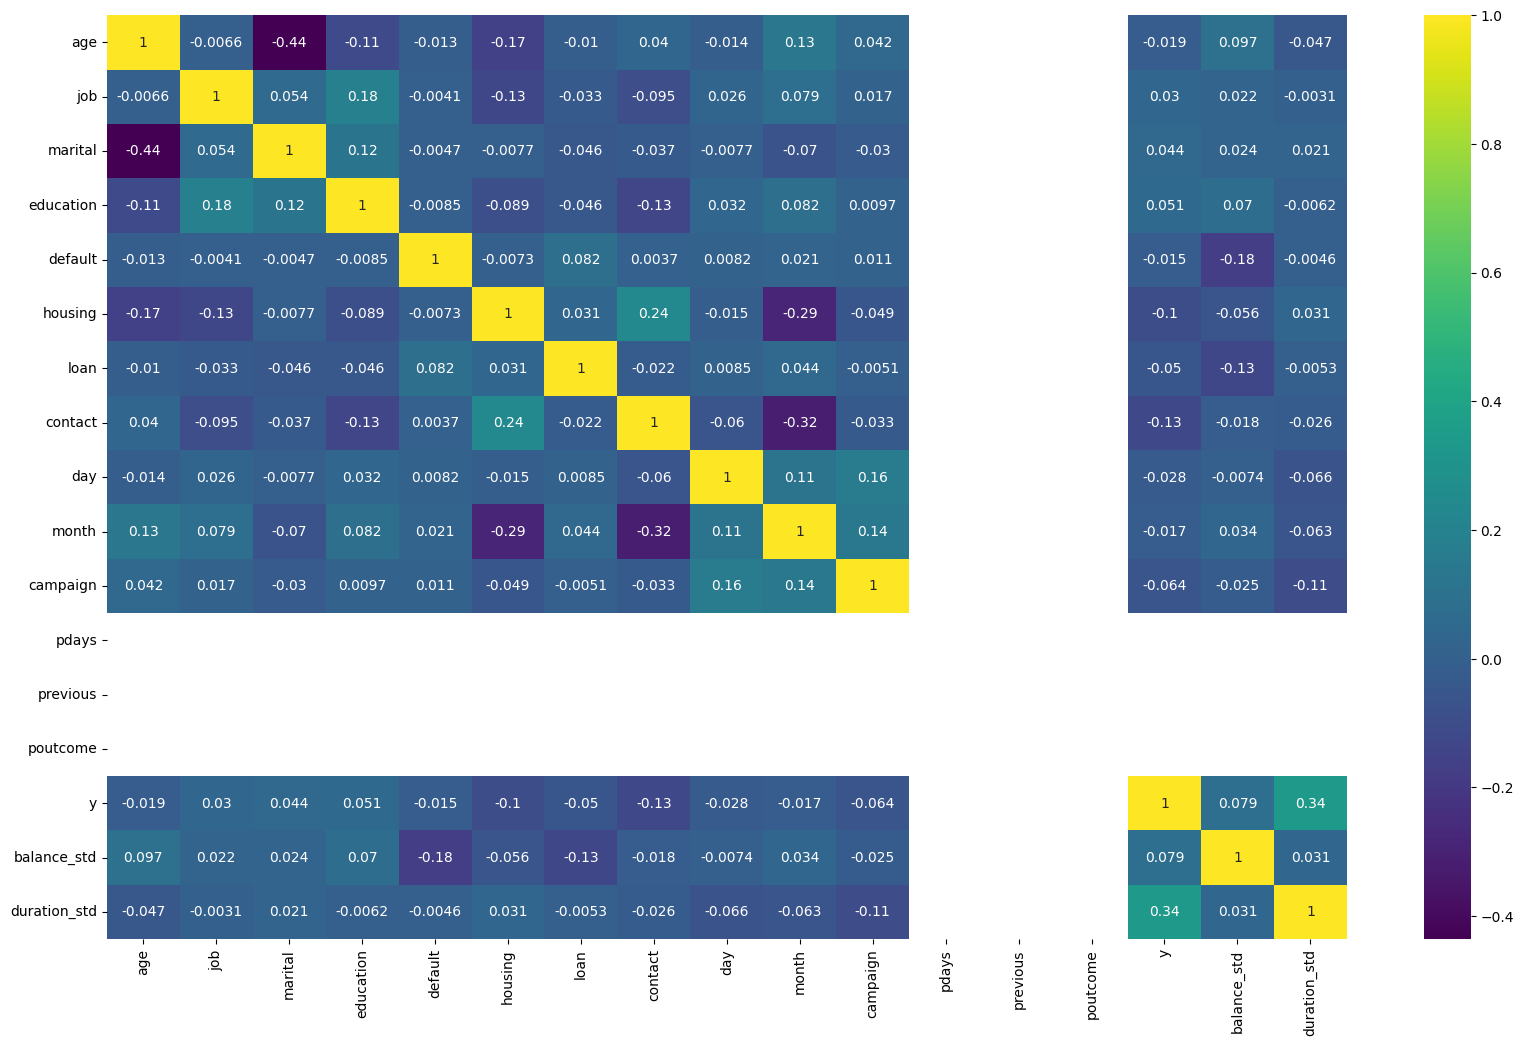

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(raw_df_filter_enco.corr(method='spearman'), cmap="viridis", annot=True)

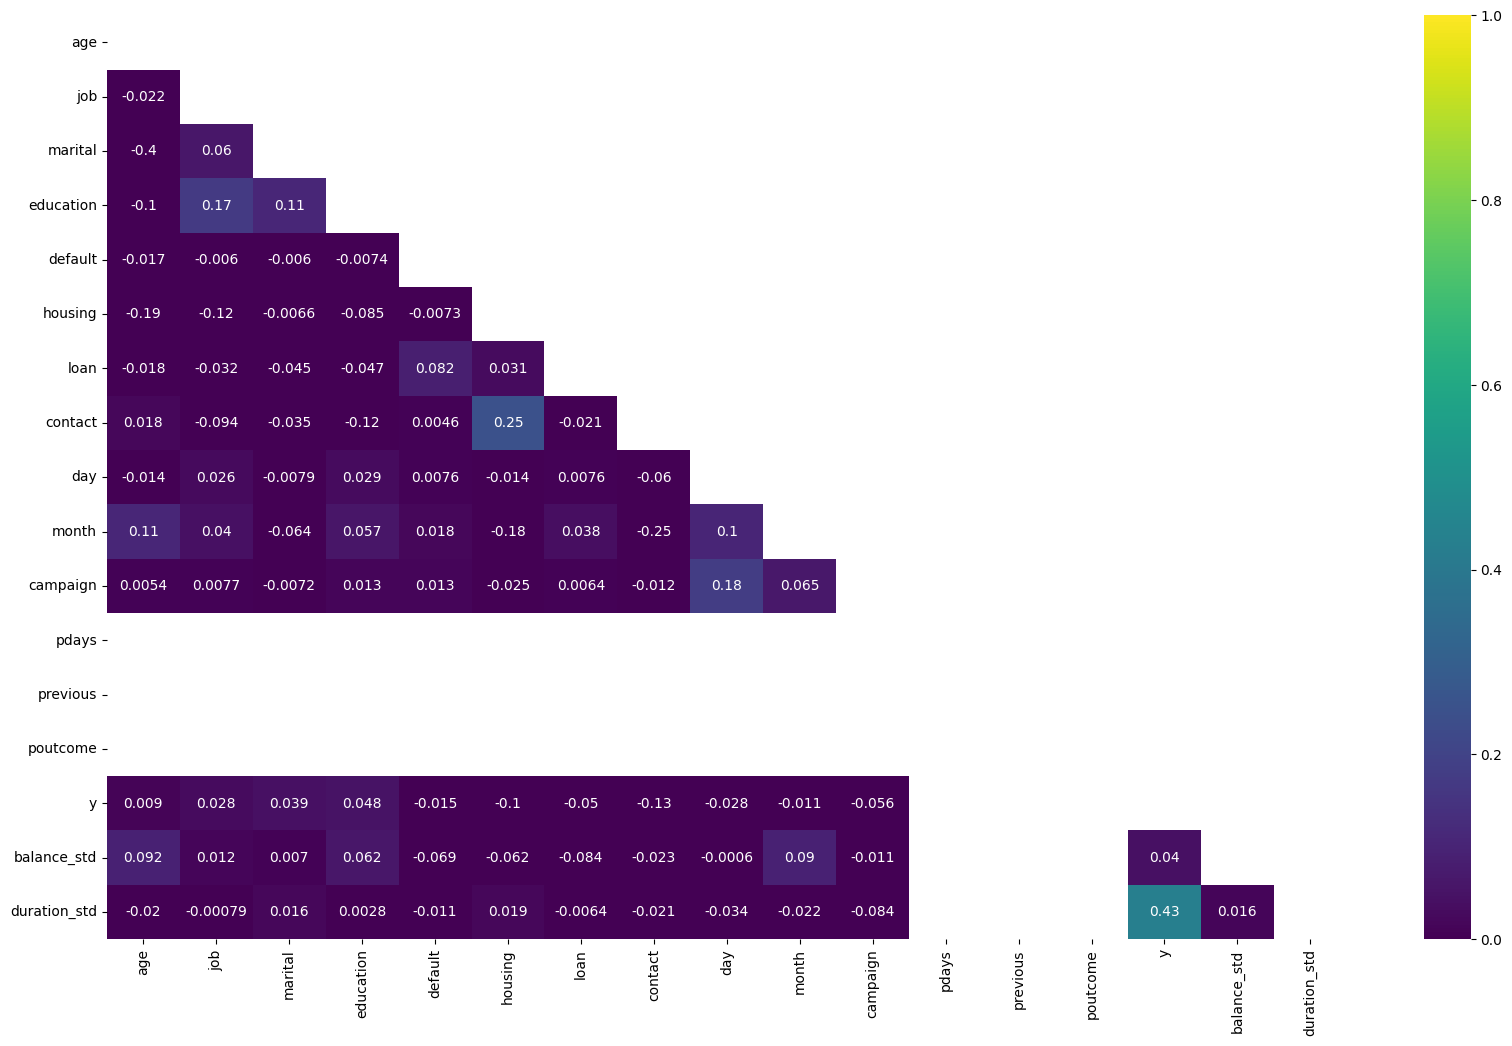

In [ ]:
plt.figure(figsize=(20, 12))
corr = raw_df_filter_enco.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
heatmap = sns.heatmap(corr, mask = mask, vmin = 0, vmax = 1, annot = True, cmap = 'viridis')

In [ ]:
raw_df_filter_enco.corr().abs()['y'].sort_values(ascending=False)

y               1.000000
duration_std    0.429003
contact         0.128769
housing         0.102794
campaign        0.056172
loan            0.049940
education       0.047879
balance_std     0.039509
marital         0.039330
job             0.028174
day             0.027620
default         0.015394
month           0.011197
age             0.009023
pdays                NaN
previous             NaN
poutcome             NaN
Name: y, dtype: float64

## Feature Extraction

In [ ]:
def categorize_age(age):
    if age <= 25:
        return "Remaja"
    elif age <= 55:
        return "Dewasa"
    else:
        return "Lansia"

In [ ]:
raw_df_filter['age']

0        58
1        44
2        33
3        47
4        33
         ..
45657    38
45658    40
45659    52
45660    28
45661    31
Name: age, Length: 36129, dtype: int64

In [ ]:
raw_df_filter['age_category'] = raw_df_filter['age'].apply(categorize_age)

In [ ]:
raw_df_filter_enco

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance_std,duration_std
0,58,4,1,2,0,1,0,2,5,5,1,-1,0,0,0,0.270651,0.011504
1,44,9,2,1,0,1,0,2,5,5,1,-1,0,0,0,-0.421141,-0.406745
2,33,2,1,1,0,1,1,2,5,5,1,-1,0,0,0,-0.429977,-0.691916
3,47,1,1,3,0,1,0,2,5,5,1,-1,0,0,0,0.062197,-0.631079
4,33,11,2,3,0,0,0,2,5,5,1,-1,0,0,0,-0.430304,-0.228039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,4,2,2,0,0,0,0,14,8,2,-1,0,0,0,0.489904,-0.425757
45658,40,3,1,0,0,0,0,0,15,10,4,-1,0,0,0,-0.110260,-0.577847
45659,52,4,1,1,0,1,0,0,22,7,4,-1,0,0,0,-0.623050,-0.672904
45660,28,4,2,2,0,0,0,0,23,3,2,-1,0,0,1,-0.147239,-0.254654


In [ ]:
raw_df_filter['pdays']

0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
        ... 
45657   -1.0
45658   -1.0
45659   -1.0
45660   -1.0
45661   -1.0
Name: pdays, Length: 36129, dtype: float64

In [ ]:
def new_klien(pdays):
    if pdays == -1.0:
        return "yes"
    else:
        return "no"

In [ ]:
raw_df_filter['new_klien'] = raw_df_filter['pdays'].apply(new_klien)

In [ ]:
raw_df_filter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,new_klien
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no,Lansia,yes
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,management,single,tertiary,no,2813,no,no,cellular,14,aug,146.0,2.0,-1.0,0.0,unknown,no,Dewasa,yes
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no,Dewasa,yes
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no,Dewasa,yes
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes,Dewasa,yes


In [ ]:
raw_df_filter['total_contacts'] = raw_df_filter['campaign'] + raw_df_filter['previous']

In [ ]:
raw_df_filter

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_category,new_klien,total_contacts
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no,Lansia,yes,1.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes,1.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no,Dewasa,yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,management,single,tertiary,no,2813,no,no,cellular,14,aug,146.0,2.0,-1.0,0.0,unknown,no,Dewasa,yes,2.0
45658,40,housemaid,married,primary,no,979,no,no,cellular,15,oct,106.0,4.0,-1.0,0.0,unknown,no,Dewasa,yes,4.0
45659,52,management,married,secondary,no,-588,yes,no,cellular,22,jul,81.0,4.0,-1.0,0.0,unknown,no,Dewasa,yes,4.0
45660,28,management,single,tertiary,no,866,no,no,cellular,23,mar,191.0,2.0,-1.0,0.0,unknown,yes,Dewasa,yes,2.0


In [ ]:
raw_df_filter_enco['housing_loan_interaction'] = raw_df_filter_enco['housing'].astype(int) + raw_df_filter_enco['loan'].astype(int) + 1

In [ ]:
raw_df_filter_enco['housing_loan_interaction'] = raw_df_filter_enco['housing_loan_interaction'].replace(3, 2)

In [ ]:
raw_df_filter_enco

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance_std,duration_std,housing_loan_interaction
0,58,4,1,2,0,1,0,2,5,5,1,-1,0,0,0,0.270651,0.011504,2
1,44,9,2,1,0,1,0,2,5,5,1,-1,0,0,0,-0.421141,-0.406745,2
2,33,2,1,1,0,1,1,2,5,5,1,-1,0,0,0,-0.429977,-0.691916,2
3,47,1,1,3,0,1,0,2,5,5,1,-1,0,0,0,0.062197,-0.631079,2
4,33,11,2,3,0,0,0,2,5,5,1,-1,0,0,0,-0.430304,-0.228039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45657,38,4,2,2,0,0,0,0,14,8,2,-1,0,0,0,0.489904,-0.425757,1
45658,40,3,1,0,0,0,0,0,15,10,4,-1,0,0,0,-0.110260,-0.577847,1
45659,52,4,1,1,0,1,0,0,22,7,4,-1,0,0,0,-0.623050,-0.672904,2
45660,28,4,2,2,0,0,0,0,23,3,2,-1,0,0,1,-0.147239,-0.254654,1


# **Machine Learning**

In [3]:
!gdown --id 1Pdlg7JMPXWK6yLzGg06xJROXkPzQE1rI

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Pdlg7JMPXWK6yLzGg06xJROXkPzQE1rI
To: /content/BankingPrePropcessing.csv
100% 2.91M/2.91M [00:00<00:00, 140MB/s]


In [4]:
# read your data
df_ml = pd.read_csv('/content/BankingPrePropcessing.csv')
df_ml.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance_std,duration_std,housing_loan_interaction
0,0,58,4,1,2,0,1,0,2,5,5,1,-1,0,0,0,0.270651,0.011504,2
1,1,44,9,2,1,0,1,0,2,5,5,1,-1,0,0,0,-0.421141,-0.406745,2
2,2,33,2,1,1,0,1,1,2,5,5,1,-1,0,0,0,-0.429977,-0.691916,2
3,3,47,1,1,3,0,1,0,2,5,5,1,-1,0,0,0,0.062197,-0.631079,2
4,4,33,11,2,3,0,0,0,2,5,5,1,-1,0,0,0,-0.430304,-0.228039,1


In [5]:
df_ml = df_ml.drop(['Unnamed: 0'], axis=1)

In [6]:
df_ml

,age,job,marital,education,default,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,balance_std,duration_std,housing_loan_interaction
0,58,4,1,2,0,1,0,2,5,5,1,-1,0,0,0,0.270651,0.011504,2
1,44,9,2,1,0,1,0,2,5,5,1,-1,0,0,0,-0.421141,-0.406745,2
2,33,2,1,1,0,1,1,2,5,5,1,-1,0,0,0,-0.429977,-0.691916,2
3,47,1,1,3,0,1,0,2,5,5,1,-1,0,0,0,0.062197,-0.631079,2
4,33,11,2,3,0,0,0,2,5,5,1,-1,0,0,0,-0.430304,-0.228039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36124,38,4,2,2,0,0,0,0,14,8,2,-1,0,0,0,0.489904,-0.425757,1
36125,40,3,1,0,0,0,0,0,15,10,4,-1,0,0,0,-0.110260,-0.577847,1
36126,52,4,1,1,0,1,0,0,22,7,4,-1,0,0,0,-0.623050,-0.672904,2
36127,28,4,2,2,0,0,0,0,23,3,2,-1,0,0,1,-0.147239,-0.254654,1


In [7]:
df_ml['y'].value_counts()

y
0    32823
1     3306
Name: count, dtype: int64

## Baseline Model

In [8]:
X = df_ml.drop(['y'], axis=1)
y = df_ml['y']

In [9]:
# split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [10]:
X_train.shape

(25290, 17)

In [11]:
y_train.shape

(25290,)

In [12]:
X_test.shape

(10839, 17)

In [13]:
y_test.shape

(10839,)

# Imbalance Data

In [14]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=0.8)
X_under, y_under = RUS.fit_resample(X, y)

In [15]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

ROS = RandomOverSampler(sampling_strategy=0.8)
X_over, y_over = ROS.fit_resample(X, y)

SMOTE = SMOTE(sampling_strategy=0.8)
X_over_SMOTE, y_over_SMOTE = SMOTE.fit_resample(X, y)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
y
0    32823
1     3306
Name: count, dtype: int64


UNDERSAMPLING
y
0    4132
1    3306
Name: count, dtype: int64


OVERSAMPLING
y
0    32823
1    26258
Name: count, dtype: int64


SMOTE
y
0    32823
1    26258
Name: count, dtype: int64


In [ ]:
# split train-test data UNDERSAMPLING
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.3, random_state = 123)

In [ ]:
X_train_under.shape

(5206, 17)

In [ ]:
y_train_under.shape

(5206,)

In [ ]:
X_test_under.shape

(2232, 17)

In [ ]:
y_test_under.shape

(2232,)

# Over Sampling

In [ ]:
# split train-test data OVERSAMPLING
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.3, random_state = 123)

In [ ]:
X_train_over.shape

(41356, 17)

In [ ]:
y_train_over.shape

(41356,)

In [ ]:
X_test_over.shape

(17725, 17)

In [ ]:
y_test_over.shape

(17725,)

# SMOTE

In [16]:
# split train-test data SMOTE
from sklearn.model_selection import train_test_split
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size = 0.3, random_state = 123)

In [17]:
X_train_SMOTE.shape

(41356, 17)

In [18]:
y_train_SMOTE.shape

(41356,)

In [19]:
X_test_SMOTE.shape

(17725, 17)

In [20]:
y_test_SMOTE.shape

(17725,)

In [ ]:

from xgboost import XGBClassifier

# Model Imbalance data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [ ]:
df_ml.y.value_counts(normalize=True)

y
0    0.908495
1    0.091505
Name: proportion, dtype: float64

## XGBoost

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

# fit model no training data
model_spw = XGBClassifier(scale_pos_weight=100)
model_spw.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# make predictions for test data
y_pred = model_spw.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:

Xgb = XGBClassifier() # inisiasi object dengan nama logreg
Xgb.fit(X_train, y_train) # fit model regression dari data train
eval_classification(Xgb)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.57
Recall (Test Set): 0.43
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.93
roc_auc (train-proba): 0.99


In [ ]:
# model paling bagus
#Xgb = XGBClassifier() # inisiasi object dengan nama logreg
#Xgb.fit(X_train, y_train) # fit model regression dari data train
eval_classification(model_spw)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.37
Recall (Test Set): 0.85
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.99


## Logistic Regression

### fit model

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.57
Recall (Test Set): 0.22
F1-Score (Test Set): 0.31
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.88


### hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.56
Recall (Test Set): 0.22
F1-Score (Test Set): 0.32
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.88


In [ ]:
show_best_hyperparameter(rs)

{'C': 0.02227777777777778, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
X.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'balance_std', 'duration_std',
       'housing_loan_interaction'],
      dtype='object')

In [ ]:
rs.best_estimator_.coef_

array([[ 5.31052279e-05, -2.57161281e-02,  4.93117522e-02,
        -1.69996247e-01, -5.44829842e-02, -4.08063383e-03,
        -1.89855600e-01, -5.43536338e-02, -1.47507292e-01,
        -2.08749858e-02, -1.76324387e-01, -2.79008024e-01,
         1.02252746e-01,  0.00000000e+00,  0.00000000e+00,
         1.02372780e-01,  1.05275284e+00, -3.04708076e-01]])

### Learning Curve

param value: 0.0001; train: 0.7719274945747233; test: 0.7705033365800478
param value: 0.000402020202020202; train: 0.8500596876112324; test: 0.8461378342537171
param value: 0.0007040404040404041; train: 0.8084219812689215; test: 0.7980844253413876
param value: 0.001006060606060606; train: 0.8414196236178462; test: 0.8305666022181374
param value: 0.001308080808080808; train: 0.8724775238539939; test: 0.8672361939474048
param value: 0.0016101010101010102; train: 0.8744832878515905; test: 0.8694984239715444
param value: 0.001912121212121212; train: 0.874842733956682; test: 0.8697875167833344
param value: 0.002214141414141414; train: 0.8773876001331921; test: 0.8695522842467655
param value: 0.002516161616161616; train: 0.8770630212379965; test: 0.8715935591381884
param value: 0.0028181818181818178; train: 0.8110995035919734; test: 0.8003604404451083
param value: 0.00312020202020202; train: 0.8779641721238378; test: 0.8724990419369691
param value: 0.003422222222222222; train: 0.838634169865

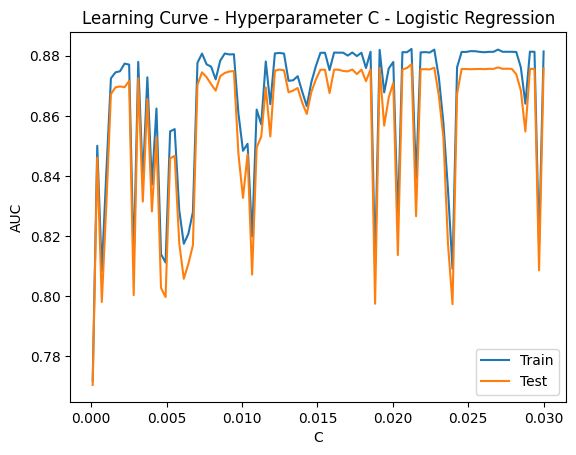

In [ ]:
# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.03, 100)]
draw_learning_curve(param_values)

## K-Nearest Neighbor

### fit model

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.56
Recall (Test Set): 0.17
F1-Score (Test Set): 0.26
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.96


### hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.51
Recall (Test Set): 0.13
F1-Score (Test Set): 0.20
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.85


### learning curve

param value: 1; train: 1.0; test: 0.6267599115706839
param value: 2; train: 0.9844041381369198; test: 0.6875360627528332
param value: 3; train: 0.9735767786678506; test: 0.7244924333698178
param value: 4; train: 0.9658357509463137; test: 0.7453228701953583
param value: 5; train: 0.9594128932129502; test: 0.7635731832151296
param value: 6; train: 0.9543868193526411; test: 0.7757164598182653
param value: 7; train: 0.9498896286316821; test: 0.7860459153430693
param value: 8; train: 0.9456804272859838; test: 0.7896122138955965
param value: 9; train: 0.9419725712557936; test: 0.7939393996085825
param value: 10; train: 0.9388119983772012; test: 0.7995946792743691
param value: 11; train: 0.9358618056698447; test: 0.8039563276863082
param value: 12; train: 0.9336419585344291; test: 0.806778724265718
param value: 13; train: 0.9308046441133356; test: 0.809112439773972
param value: 14; train: 0.9279262813029849; test: 0.8116389494666553
param value: 15; train: 0.9253774442449967; test: 0.81796487

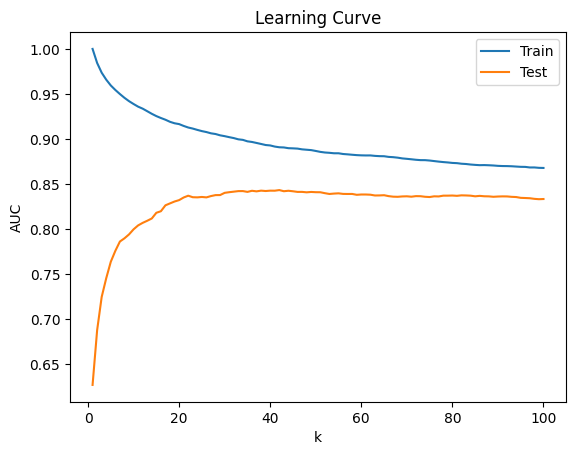

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

## Decision Tree


### fit model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Test Set): 0.89
Precision (Test Set): 0.43
Recall (Test Set): 0.45
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.69
roc_auc (train-proba): 1.00


### hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.49
Recall (Test Set): 0.12
F1-Score (Test Set): 0.19
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.85


## Random Forrest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train) # fit model RandomForest dari data train
eval_classification(rf)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.58
Recall (Test Set): 0.32
F1-Score (Test Set): 0.42
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


# Under Sampling

In [ ]:
# split train-test data UNDERSAMPLING
from sklearn.model_selection import train_test_split
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.3, random_state = 123)

In [ ]:
X_train_under.shape

(5206, 17)

In [ ]:
X_test_under.shape

(2232, 17)

## Model Under

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred_under = model.predict(X_test_under)
    y_pred_train_under = model.predict(X_train_under)
    y_pred_proba_under = model.predict_proba(X_test_under)
    y_pred_proba_train_under = model.predict_proba(X_train_under)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test_under, y_pred_under))
    print("Precision (Test Set): %.2f" % precision_score(y_test_under, y_pred_under))
    print("Recall (Test Set): %.2f" % recall_score(y_test_under, y_pred_under))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test_under, y_pred_under))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test_under, y_pred_proba_under[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_under, y_pred_proba_train_under[:, 1]))


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train_under, y_train_under)

        # eval on train
        y_pred_train_proba_under = model.predict_proba(X_train_under)
        train_auc_under = roc_auc_score(y_train_under, y_pred_train_proba_under[:,1])
        train_scores.append(train_auc_under)

        # eval on test
        y_pred_proba_under = model.predict_proba(X_test_under)
        test_auc_under = roc_auc_score(y_test_under, y_pred_proba_under[:,1])
        test_scores.append(test_auc_under)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg_under = LogisticRegression() # inisiasi object dengan nama logreg
logreg_under.fit(X_train_under, y_train_under) # fit model regression dari data train
eval_classification(logreg_under)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.80
Recall (Test Set): 0.74
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn_under = KNeighborsClassifier() # inisiasi object dengan nama knn
knn_under.fit(X_train_under, y_train_under) # fit model KNN dari data train
eval_classification(knn_under)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.77
Recall (Test Set): 0.63
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.81
roc_auc (train-proba): 0.92


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt_under = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt_under.fit(X_train_under, y_train_under) # fit model decision tree dari data train
eval_classification(dt_under)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.78
Recall (Test Set): 0.75
F1-Score (Test Set): 0.76
roc_auc (test-proba): 0.79
roc_auc (train-proba): 1.00


### Random Forrest

In [ ]:
rf_under = RandomForestClassifier()
rf_under.fit(X_train_under, y_train_under) # fit model RandomForest dari data train
eval_classification(rf_under)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.82
Recall (Test Set): 0.86
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.93
roc_auc (train-proba): 1.00


# Over Sampling

In [ ]:
# split train-test data OVERSAMPLING
from sklearn.model_selection import train_test_split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.3, random_state = 123)

## Model Over

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred_over = model.predict(X_test_over)
    y_pred_train_over = model.predict(X_train_over)
    y_pred_proba_over = model.predict_proba(X_test_over)
    y_pred_proba_train_over = model.predict_proba(X_train_over)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test_over, y_pred_over))
    print("Precision (Test Set): %.2f" % precision_score(y_test_over, y_pred_over))
    print("Recall (Test Set): %.2f" % recall_score(y_test_over, y_pred_over))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test_over, y_pred_over))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test_over, y_pred_proba_over[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_over, y_pred_proba_train_over[:, 1]))


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train_over, y_train_over)

        # eval on train
        y_pred_train_proba_over = model.predict_proba(X_train_over)
        train_auc_over = roc_auc_score(y_train_over, y_pred_train_proba_over[:,1])
        train_scores.append(train_auc_over)

        # eval on test
        y_pred_proba_over = model.predict_proba(X_test_over)
        test_auc_over = roc_auc_score(y_test_over, y_pred_proba_over[:,1])
        test_scores.append(test_auc_over)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg_over = LogisticRegression() # inisiasi object dengan nama logreg
logreg_over.fit(X_train_over, y_train_over) # fit model regression dari data train
eval_classification(logreg_over)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.80
Recall (Test Set): 0.75
F1-Score (Test Set): 0.77
roc_auc (test-proba): 0.89
roc_auc (train-proba): 0.89



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn_over = KNeighborsClassifier() # inisiasi object dengan nama knn
knn_over.fit(X_train_over, y_train_over) # fit model KNN dari data train
eval_classification(knn_over)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.85
Recall (Test Set): 0.96
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.99


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt_over = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt_over.fit(X_train_over, y_train_over) # fit model decision tree dari data train
eval_classification(dt_over)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.92
Recall (Test Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 0.96
roc_auc (train-proba): 1.00


### Random Forrest

In [ ]:
rf_over = RandomForestClassifier()
rf_over.fit(X_train_over, y_train_over) # fit model RandomForest dari data train
eval_classification(rf_over)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.93
Recall (Test Set): 1.00
F1-Score (Test Set): 0.97
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00


# SMOTE Sampling

In [21]:
# split train-test data SMOTE
from sklearn.model_selection import train_test_split
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size = 0.3, random_state = 123)

## Model SMOTE

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred_SMOTE = model.predict(X_test_SMOTE)
    y_pred_train_SMOTE = model.predict(X_train_SMOTE)
    y_pred_proba_SMOTE = model.predict_proba(X_test_SMOTE)
    y_pred_proba_train_SMOTE = model.predict_proba(X_train_SMOTE)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test_SMOTE, y_pred_SMOTE))
    print("Precision (Test Set): %.2f" % precision_score(y_test_SMOTE, y_pred_SMOTE))
    print("Recall (Test Set): %.2f" % recall_score(y_test_SMOTE, y_pred_SMOTE))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test_SMOTE, y_pred_SMOTE))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test_SMOTE, y_pred_proba_SMOTE[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_SMOTE, y_pred_proba_train_SMOTE[:, 1]))


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train_over, y_train_over)

        # eval on train
        y_pred_train_proba_SMOTE = model.predict_proba(X_train_SMOTE)
        train_auc_SMOTE = roc_auc_score(y_train_SMOTE, y_pred_train_proba_SMOTE[:,1])
        train_scores.append(train_auc_SMOTE)

        # eval on test
        y_pred_proba_SMOTE = model.predict_proba(X_test_SMOTE)
        test_auc_SMOTE = roc_auc_score(y_test_SMOTE, y_pred_proba_SMOTE[:,1])
        test_scores.append(test_auc_SMOTE)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg_SMOTE = LogisticRegression() # inisiasi object dengan nama logreg
logreg_SMOTE.fit(X_train_SMOTE, y_train_SMOTE) # fit model regression dari data train
eval_classification(logreg_SMOTE)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.84
Recall (Test Set): 0.84
F1-Score (Test Set): 0.84
roc_auc (test-proba): 0.92
roc_auc (train-proba): 0.92


### KKN

In [24]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn_SMOTE = KNeighborsClassifier() # inisiasi object dengan nama knn
knn_SMOTE.fit(X_train_SMOTE, y_train_SMOTE) # fit model KNN dari data train
eval_classification(knn_SMOTE)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.86
Recall (Test Set): 0.99
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


param value: 1; train: 0.9957458942696791; test: 0.9725778209459834
param value: 2; train: 0.9957458942696791; test: 0.9725778209459834
param value: 3; train: 0.9957458942696791; test: 0.9725778209459834
param value: 4; train: 0.9957458942696791; test: 0.9725778209459834
param value: 5; train: 0.9957458942696791; test: 0.9725778209459834
param value: 6; train: 0.9957458942696791; test: 0.9725778209459834
param value: 7; train: 0.9957458942696791; test: 0.9725778209459834
param value: 8; train: 0.9957458942696791; test: 0.9725778209459834
param value: 9; train: 0.9957458942696791; test: 0.9725778209459834
param value: 10; train: 0.9957458942696791; test: 0.9725778209459834
param value: 11; train: 0.9957458942696791; test: 0.9725778209459834
param value: 12; train: 0.9957458942696791; test: 0.9725778209459834
param value: 13; train: 0.9957458942696791; test: 0.9725778209459834
param value: 14; train: 0.9957458942696791; test: 0.9725778209459834
param value: 15; train: 0.9957458942696791;

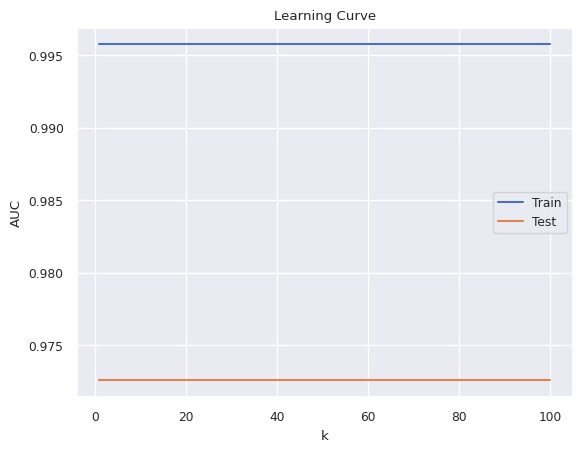

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model_SMOTE = KNeighborsClassifier()
        model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)

        # eval on train
        y_pred_train_proba_SMOTE = model_SMOTE.predict_proba(X_train_SMOTE)
        train_auc_SMOTE = roc_auc_score(y_train_SMOTE, y_pred_train_proba_SMOTE[:,1])
        train_scores.append(train_auc_SMOTE)

        # eval on test
        y_pred_proba_SMOTE = model_SMOTE.predict_proba(X_test_SMOTE)
        test_auc_SMOTE = roc_auc_score(y_test_SMOTE, y_pred_proba_SMOTE[:,1])
        test_scores.append(test_auc_SMOTE)

        print('param value: ' + str(i) + '; train: ' + str(train_auc_SMOTE) + '; test: '+ str(test_auc_SMOTE))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Hyperparameter tuning KNN

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_SMOTE = KNeighborsClassifier()
kfold8 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search3 = GridSearchCV(knn_SMOTE, param_grid=params, scoring='recall', cv=kfold8)
grid_search3.fit(X_train_SMOTE, y_train_SMOTE)

print('Best parameters:', grid_search3.best_params_)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


knn_SMOTE = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1, weights='distance')

In [25]:
# metric evaluasi model KNN dengan hyperparamatertuning
knn_SMOTE_t = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1, weights='distance') # inisiasi object dengan nama knn
knn_SMOTE_t.fit(X_train_SMOTE, y_train_SMOTE) # fit model KNN dari data train
eval_classification(knn_SMOTE_t)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.88
Recall (Test Set): 0.99
F1-Score (Test Set): 0.93
roc_auc (test-proba): 0.97
roc_auc (train-proba): 1.00


In [26]:
X = df_ml.drop(['y'], axis=1)
y = df_ml['y']

In [27]:
y_pred = knn_SMOTE_t.predict(X)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [30]:
unique, frequency = np.unique(y_pred,
                              return_counts = True)
# print unique values array
print("Unique Values:",
      unique)

# print frequency array
print("Frequency Values:",
      frequency)

Unique Values: [0 1]
Frequency Values: [31794  4335]


In [ ]:
from sklearn.metrics import classification_report
y_pred_SMOTE = grid_search3.predict(X_test_SMOTE)

y_pred_proba_SMOTE = grid_search3.predict_proba(X_test_SMOTE)
y_pred_proba_train_SMOTE = grid_search3.predict_proba(X_train_SMOTE)

report = (classification_report(y_test_SMOTE, y_pred_SMOTE))

rtest = roc_auc_score(y_test_SMOTE, y_pred_proba_SMOTE[:, 1])
rtrain = roc_auc_score(y_train_SMOTE, y_pred_proba_train_SMOTE[:, 1])

auc = roc_auc_score(y_test_SMOTE, y_pred_SMOTE)

print('MODEL EVALUATION :\n', report)
print('-' * 55, '\n')
print('AUC Test score:', rtest.round(4))
print('AUC Train scores:', rtrain.round(4))

MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      9836
           1       0.87      0.99      0.93      7889

    accuracy                           0.93     17725
   macro avg       0.93      0.94      0.93     17725
weighted avg       0.94      0.93      0.93     17725

------------------------------------------------------- 

AUC Test score: 0.9792
AUC Train scores: 1.0


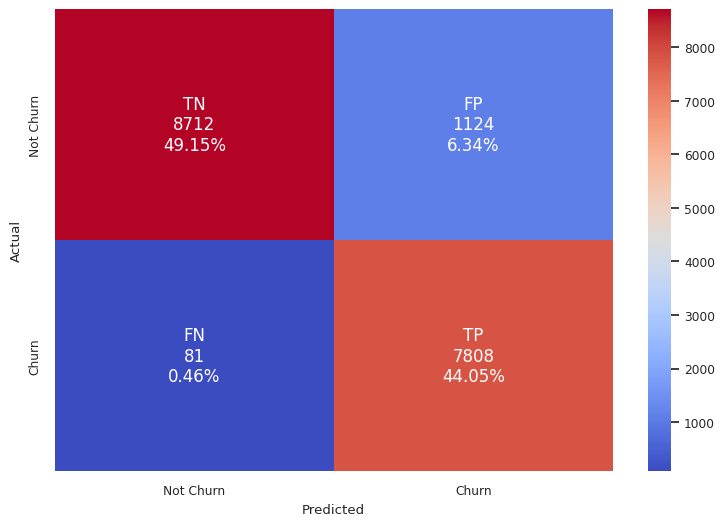

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_SMOTE, y_pred_SMOTE)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(9,6))
sns.set(font_scale=0.8)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12},
            yticklabels=['Not Churn','Churn'], xticklabels=['Not Churn','Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

param value: 1 train recall: 1.0 test recall: 0.9875776397515528
param value: 2 train recall: 1.0 test recall: 0.9875776397515528
param value: 3 train recall: 1.0 test recall: 0.9875776397515528
param value: 4 train recall: 1.0 test recall: 0.9875776397515528
param value: 5 train recall: 1.0 test recall: 0.9875776397515528
param value: 6 train recall: 1.0 test recall: 0.9875776397515528
param value: 7 train recall: 1.0 test recall: 0.9875776397515528
param value: 8 train recall: 1.0 test recall: 0.9875776397515528
param value: 9 train recall: 1.0 test recall: 0.9875776397515528
param value: 10 train recall: 1.0 test recall: 0.9875776397515528
param value: 11 train recall: 1.0 test recall: 0.9875776397515528
param value: 12 train recall: 1.0 test recall: 0.9875776397515528
param value: 13 train recall: 1.0 test recall: 0.9875776397515528
param value: 14 train recall: 1.0 test recall: 0.9875776397515528
param value: 15 train recall: 1.0 test recall: 0.9875776397515528
param value: 16 tra

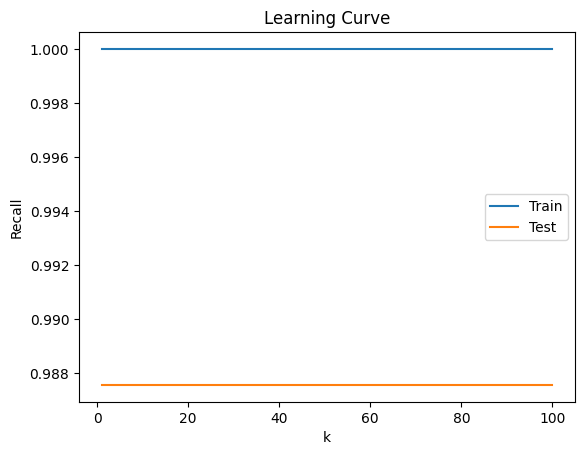

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        knn_SMOTE_t = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1, weights='distance')
        knn_SMOTE_t.fit(X_train_SMOTE, y_train_SMOTE)

        # eval on train
        y_pred_train_SMOTE_t = knn_SMOTE_t.predict(X_train_SMOTE)
        train_recall_SMOTE_t = recall_score(y_train_SMOTE, y_pred_train_SMOTE_t)
        train_scores.append(train_recall_SMOTE_t)

        # eval on test
        y_pred_SMOTE_t = knn_SMOTE_t.predict(X_test_SMOTE)
        test_recall_SMOTE_t = recall_score(y_test_SMOTE, y_pred_SMOTE_t)
        test_scores.append(test_recall_SMOTE_t)

        print('param value:', i, 'train recall:', train_recall_SMOTE_t, 'test recall:', test_recall_SMOTE_t)

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('Recall')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        knn_SMOTE_t = KNeighborsClassifier(n_neighbors=3, algorithm='auto', p=1, weights='distance')
        knn_SMOTE_t.fit(X_train_SMOTE, y_train_SMOTE)

        # eval on train
        y_pred_train_proba_SMOTE_t = knn_SMOTE_t.predict_proba(X_train_SMOTE)
        train_auc_SMOTE_t = roc_auc_score(y_train_SMOTE, y_pred_train_proba_SMOTE_t[:,1])
        train_scores.append(train_auc_SMOTE_t)

        # eval on test
        y_pred_proba_SMOTE_t = knn_SMOTE_t.predict_proba(X_test_SMOTE)
        test_auc_SMOTE_t = roc_auc_score(y_test_SMOTE, y_pred_proba_SMOTE_t[:,1])
        test_scores.append(test_auc_SMOTE_t)

        print('param value: ' + str(i) + '; train: ' + str(train_auc_SMOTE_t) + '; test: '+ str(test_auc_SMOTE_t))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt_SMOTE = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt_SMOTE.fit(X_train_SMOTE, y_train_SMOTE) # fit model decision tree dari data train
eval_classification(dt_SMOTE)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.87
Recall (Test Set): 0.90
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.90
roc_auc (train-proba): 1.00


### Random Forest

In [ ]:
rf_SMOTE = RandomForestClassifier()
rf_SMOTE.fit(X_train_SMOTE, y_train_SMOTE) # fit model RandomForest dari data train
eval_classification(rf_SMOTE)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.90
Recall (Test Set): 0.95
F1-Score (Test Set): 0.92
roc_auc (test-proba): 0.98
roc_auc (train-proba): 1.00


## Feature Importance

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'balance_std', 'duration_std', 'housing_loan_interaction'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Inisialisasi dan melatih model KNN
knn_SMOTE_t = KNeighborsClassifier()
knn_SMOTE_t.fit(X_train_SMOTE, y_train_SMOTE)

# Menggunakan ANOVA untuk menentukan pengaruh fitur
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_SMOTE, y_train_SMOTE)

# Membuat dataframe dengan fitur dan skor pengaruhnya
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': selector.scores_})

# Mengurutkan dataframe berdasarkan skor pengaruh
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan dataframe
print(feature_importance_df)

                     Feature    Importance
15              duration_std  17022.491093
16  housing_loan_interaction   5062.020765
7                    contact   4523.705445
5                    housing   4372.647546
6                       loan   1987.212000
10                  campaign   1215.636551
4                    default    288.789005
2                    marital    198.329929
8                        day    186.646365
3                  education    139.343358
9                      month    114.705973
14               balance_std    106.034531
1                        job     15.915183
0                        age      0.372526
11                     pdays           NaN
12                  previous           NaN
13                  poutcome           NaN


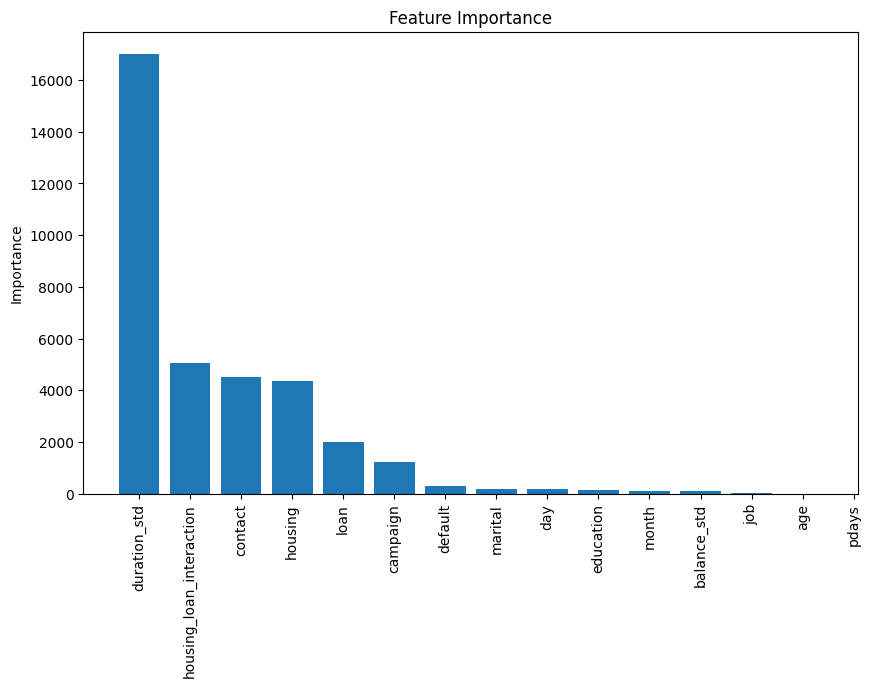

In [ ]:
import matplotlib.pyplot as plt
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Mengatur ukuran gambar
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.8 MB/s eta 0:00:00
